### **0. Mục lục:**
  + Giới thiệu chung về bộ dữ liệu.
    + Phương pháp thu thập.
    + Cấu trúc bộ dữ liệu MIMIC-IV.
    + Quy tắc ẩn danh dữ liệu được áp dụng.
  + Chi tiết về bộ dữ liệu:
    + Gồm có các nhóm bảng nào? (Vai trò của mỗi nhóm)
    + Mỗi nhóm gồm có những bảng nào? (Vai trò của mỗi bảng)
    + Mỗi bảng có những trường dữ liệu nào? (Ý nghĩa của chúng)
    + Relationship giữa các bảng?
  + Tổng hợp các bước xử lý làm sạch/chuẩn hóa dữ liệu:
    + Lọc các giá trị bị thiếu: Null, NaN, chuỗi rỗng.
    + Xử lý các trường hợp không nhất quán dữ liệu:
      + Không nhất quán về format (ngày tháng, sdt, đơn vị đo).
      + Không nhất quán về đơn vị đo (Ví dụ: cùng là 1 thứ nhưng lại dùng 2 đơn vị đo khác nhau mg/l hoặc mg/ml)
      + Không nhất quán về tên các thực thể (cùng 1 entity nhưng có nhiều tên khác nhau)
    + Loại bỏ bản ghi trùng lặp.
    + Kiểu giữ liệu không đúng (Ví dụ: 1 trường có giá trị số, bình thường khi import vào database thì sẽ để kiểu float hoặc integer, nhưng khi nhập thì có thể nhập vào 1 số dữ liệu không thể convert thành dạng số. VD: "dasdasda", "3 ", "q23",...).
    + Giá trị không hợp lệ (Ví dụ: Giá trị huyết áp thì không thể âm hoặc quá cao)
    + Và các lỗi mã hóa ký tự (UTF-8, ASCII conflicts)

### **1. Giới thiệu chung về bộ dữ liệu**

- Bộ dữ liệu sử dụng tên là: MIMIC IV
- Là dữ liệu thực được trích xuất từ hồ sơ sức khỏe điện tử (EHR) của Bệnh viện Beth Israel Deaconess Medical Center.

#### **1.1. Phương pháp thu thập**

**MIMIC-IV** là kết quả của sự hợp tác giữa **Beth Israel Deaconess Medical Center (BIDMC)** và **Viện Công nghệ Massachusetts (MIT)**.
Dữ liệu được thu thập tại BIDMC trong quá trình chăm sóc lâm sàng thường ngày đã được **ẩn danh**, chuyển đổi sơ bộ, và cung cấp cho các nhà nghiên cứu (những người đã hoàn thành khóa huấn luyện nghiên cứu trên người và ký thỏa thuận sử dụng dữ liệu).


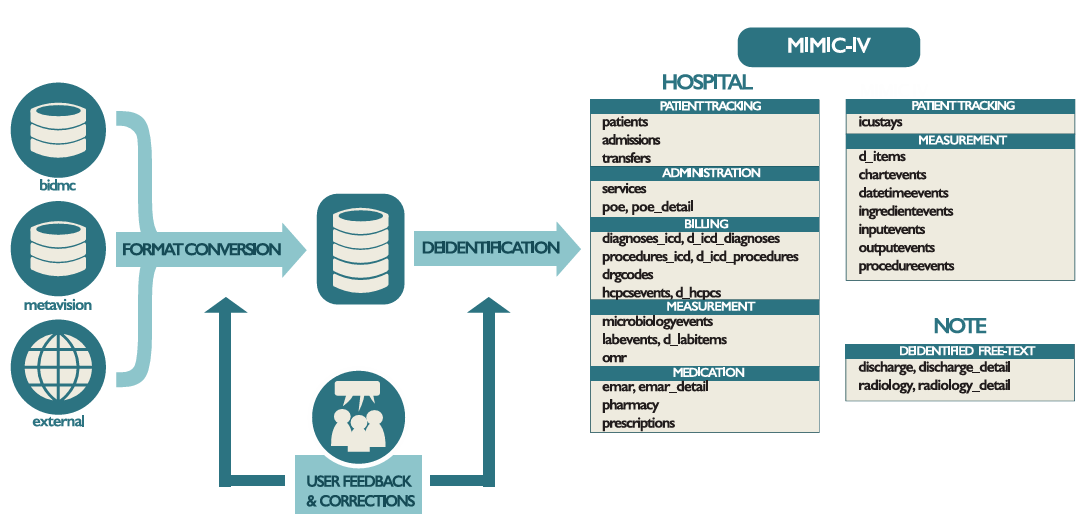

#### **1.2. Cấu trúc của bộ dữ liệu MIMIC-IV.**

- Dạng cơ sở dữ liệu quan hệ với quan hệ được định nghĩa sẵn qua bảng và cột.

- Dữ liệu chia thành 3 module chính:

  + **hosp** (toàn viện – thông tin nhập viện, xét nghiệm, hành chính, vi sinh…)

  + **icu** (tại giường bệnh ICU – truyền dịch, quan sát, thủ thuật…)

  + **note** (ghi chú văn bản tự do – tóm tắt xuất viện, báo cáo chẩn đoán hình ảnh).

- Dữ liệu được công bố dưới dạng các file .csv (đại diện cho các bảng).

#### **1.3. Quy tắc ẩn danh dữ liệu được áp dụng.**

Dữ liệu này là dữ liệu thực về y tế, có nhiều thông tin nhạy cảm, riêng tư. Nên buộc phải ẩn danh để tránh những rủi ro khi bị lộ danh tính bệnh nhân.

Theo quy định của HIPAA Safe Harbor, có 18 loại thông tin định danh cá nhân (ví dụ: tên, địa chỉ, số seri, tuổi…) phải được loại bỏ để một bộ dữ liệu được xem là đã ẩn danh. Khi đã ẩn danh, dữ liệu có thể được chia sẻ vượt ra ngoài các đơn vị y tế ban đầu.

Để đảm bảo điều này, nhóm nghiên cứu đã phát triển các thuật toán tùy chỉnh để phát hiện và loại bỏ những thông tin nhận diện cá nhân (PHI – Protected Health Information).

Cách thực hiện:
  + Bảng tra cứu (lookup tables) được dùng để gán ngẫu nhiên cho mỗi bệnh nhân một **mã định danh duy nhất (subject_id)** và cho **mỗi lần nhập viện một mã duy nhất (hadm_id)**.

  + **Ngày tháng bị thay đổi bằng cách dịch chuyển chúng theo một khoảng thời gian nhất quán ở từng bệnh nhân.** Điều này giữ cho các khoảng thời gian giữa các mốc của cùng một bệnh nhân vẫn chính xác.

  + Đối với văn bản tự do (free-text), nhóm sử dụng kết hợp hai thuật toán công bố trước đó để loại bỏ PHI.

  + Nếu một trong hai thuật toán phát hiện thông tin nhạy cảm, nó sẽ bị thay thế bằng dấu gạch dưới liên tiếp “___”.

  + Cách này áp dụng cả cho ghi chú lâm sàng trong module note lẫn các trường văn bản tự do khác trong dữ liệu có cấu trúc (ví dụ trường “ghi chú bổ sung”).

  + Sau đó, kết quả được kiểm tra thủ công bởi chuyên gia và, nếu có thể, xây dựng thêm danh sách trắng (allow list) để lọc dữ liệu trước khi phát hành.

### **2. Chi tiết về bộ dữ liệu.**

#### **2.1. Bộ dữ liệu gồm những nhóm bảng (group table) nào?**

*Trong quá trình tìm hiểu dữ liệu, tôi cũng sẽ import các file .csv vào Postgres Database, rồi dùng DBeaver để xem và thao tác dữ liệu, ngoài ra, cũng dùng DBeaver để tự động tạo ERD xem mối quan hệ cụ thể giữa các bảng (vì import toàn bộ file rất nặng, tốn thời gian, nên mõi file import 100 dòng thôi để hiểu relationship của nó là được).*

*Ngoài ra, cũng xem xét quy mô dữ liệu (mỗi bảng bao nhiều row) để tối ưu.*

##### **2.1.1. Module hosp (Bệnh viện)**
- Ghi lại dữ liệu từ toàn bộ bệnh viện Beth Israel Deaconess Medical Center.

- Bao gồm:

  + Hành chính: thông tin nhập viện, ra viện, phòng ban.

  + Dịch vụ lâm sàng: xét nghiệm (lab tests), thuốc được kê, thủ thuật y tế.

  + Hóa đơn & thanh toán: chẩn đoán (diagnoses), thủ thuật (procedures), bảo hiểm.

###### **2.1.1.1. Theo dõi bệnh nhân (Patient tracking)**

- Bảng *patient*:

| Trường             | Loại dữ liệu    | Ý nghĩa                                                  | Mô tả                                                                                     |
|--------------------|-----------------|----------------------------------------------------------|-------------------------------------------------------------------------------------------|
| subject_id  (PK)       | int       | Mã định danh duy nhất cho bệnh nhân                      | Khóa chính dùng để liên kết với các bảng khác như admissions, diagnoses_icd, hoặc labevents. |
| gender             | string          | Giới tính của bệnh nhân                                  | F: Nữ; M: Nam.                                                                           |
| anchor_age         | int       | Tuổi neo (anchor age) của bệnh nhân                      | Tuổi gần đúng của bệnh nhân tại thời điểm anchor_year, để bảo vệ thông tin cá nhân.       |
| anchor_year        | int      | Năm neo (anchor year)                                    | Năm tham chiếu được điều chỉnh để bảo vệ thông tin cá nhân, không phải năm thực tế.       |
| anchor_year_group  | string          | Nhóm năm neo                                             | Khoảng năm (ví dụ: 2008 - 2010) để xác định khoảng thời gian dữ liệu của bệnh nhân.       |
| dod                | date           | Ngày tử vong (nếu có)                                    | Ngày bệnh nhân tử vong, có thể để trống (NULL) nếu bệnh nhân còn sống hoặc không ghi nhận. |

Vì bộ dữ liệu đã được dịch chuyển thời gian để bảo mật thông tin nên không thể phân tích timeline.

🔑 **Tức là:**

- Nếu muốn làm báo cáo quản trị bệnh viện (tháng này, quý này, năm này) → MIMIC-IV không phù hợp.

- Nếu muốn làm phân tích nghiên cứu y sinh (pattern trong điều trị, outcome theo độ tuổi, mô hình dự đoán) → MIMIC-IV rất phù hợp.

**=> Do đó, khi thiết kế DWH sau này, các bảng dim/fact/mart sẽ phải cân nhắc kỹ hơn vì không có dim_time/dim_date như mô hình Kimball/Imnon truyền thống.**

- Bảng *admissions:*

| Trường               | Loại dữ liệu    | Ý nghĩa                                                                    | Mô tả                                                                                       |
|----------------------|-----------------|----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| subject_id  (FK)         | int       | Mã định danh duy nhất cho bệnh nhân                                        | Khóa ngoại để liên kết với bảng patients để lấy thông tin nhân khẩu học.                    |
| hadm_id    (PK)          | int       | Mã định danh duy nhất cho lần nhập viện                                    | Mỗi lần nhập viện của bệnh nhân được gán một hadm_id riêng.                                 |
| admittime            | date       | Thời gian nhập viện                                                       | Ghi lại thời điểm chính xác (ngày và giờ) khi bệnh nhân được nhận vào bệnh viện.           |
| dischtime            | date       | Thời gian xuất viện                                                       | Thời điểm bệnh nhân rời bệnh viện (về nhà, chuyển viện, hoặc tử vong).                     |
| deathtime            | date       | Thời gian tử vong (nếu có)                                                | Chỉ điền nếu bệnh nhân tử vong trong bệnh viện, để trống (NULL) nếu không tử vong.         |
| admission_type       | string          | Loại hình nhập viện                                                       | Ví dụ: Elective (kế hoạch), Emergency (khẩn cấp), Urgent, Newborn, Observation.             |
| admit_provider_id    | string          | Mã định danh nhà cung cấp dịch vụ y tế                                     | Liên kết với bảng provider để xác định bác sĩ/nhóm y tế phụ trách nhập viện.                |
| admission_location   | string          | Nơi bệnh nhân được chuyển đến khi nhập viện                                | Ví dụ: Emergency Room, Physician Referral, Transfer from Hospital, Clinic Referral.         |
| discharge_location   | string          | Nơi bệnh nhân được chuyển đến sau xuất viện                                | Ví dụ: Home, Skilled Nursing Facility, Rehab, Deceased, Another Hospital.                   |
| insurance            | string          | Loại bảo hiểm y tế của bệnh nhân                                           | Ví dụ: Medicare, Medicaid, Private, Other.                                                  |
| language             | string          | Ngôn ngữ chính của bệnh nhân                                              | Thường là ENGLISH hoặc OTHER, hỗ trợ xác định nhu cầu phiên dịch.                          |
| marital_status       | string          | Tình trạng hôn nhân của bệnh nhân                                         | Ví dụ: Married, Single, Divorced, Widowed. Có thể để trống (NULL).                         |
| race                 | string          | Chủng tộc hoặc dân tộc của bệnh nhân                                      | Ví dụ: White, Black/African American, Asian, Hispanic/Latino, Unknown.                      |
| edregtime            | date       | Thời gian đăng ký tại phòng cấp cứu (nếu có)                               | Thời điểm đăng ký tại phòng cấp cứu trước khi nhập viện, để trống nếu không qua cấp cứu.    |
| edouttime            | date       | Thời gian rời khỏi phòng cấp cứu (nếu có)                                 | Thời điểm rời phòng cấp cứu để chuyển vào khoa nội trú hoặc xuất viện, để trống nếu không áp dụng. |
| hospital_expire_flag | bool (0/1)| Cờ báo hiệu bệnh nhân tử vong trong bệnh viện                              | 0: Không tử vong; 1: Tử vong trong bệnh viện.                                               |

- Bảng *transfers:*

| Trường | Loại dữ liệu | Ý nghĩa | Mô tả |
|--------|--------------|---------|-------|
| subject_id (FK) | int | Mã định danh duy nhất cho bệnh nhân | Khóa chính liên kết với bảng patients để lấy thông tin nhân khẩu học. |
| hadm_id (FK)| int | Mã định danh duy nhất cho lần nhập viện | Liên kết với bảng admissions, có thể để trống nếu chuyển viện không liên quan nhập viện. |
| transfer_id (PK) | int | Mã định danh duy nhất cho mỗi lần chuyển viện | Mã duy nhất cho mỗi sự kiện chuyển viện trong bệnh viện hoặc giữa các cơ sở. |
| eventtype | string | Loại sự kiện chuyển viện | Ví dụ: admit (nhập viện), transfer (chuyển khoa), discharge (xuất viện), ED (cấp cứu). |
| careunit | string | Đơn vị chăm sóc nơi bệnh nhân được chuyển đến | Ví dụ: ICU, Medical/Surgical, Emergency Department, hoặc để trống nếu không áp dụng. |
| intime | date | Thời gian bắt đầu sự kiện chuyển viện | Thời điểm bệnh nhân được chuyển đến đơn vị chăm sóc hoặc rời khỏi bệnh viện. |
| outtime | date | Thời gian kết thúc sự kiện chuyển viện | Thời điểm bệnh nhân rời đơn vị chăm sóc, có thể để trống nếu sự kiện đang diễn ra. |

###### **2.1.1.2. Quản lý hành chính (Administration)**

- Bảng *services:*

| Trường | Loại dữ liệu | Ý nghĩa | Mô tả |
|--------|--------------|---------|-------|
| subject_id (FK) | int | Mã định danh duy nhất cho bệnh nhân | Khóa chính liên kết với bảng patients để lấy thông tin nhân khẩu học. |
| hadm_id (FK) (PK) | int | Mã định danh duy nhất cho lần nhập viện | Liên kết với bảng admissions để xác định lần nhập viện cụ thể. |
| transfertime (PK)| date | Thời gian chuyển đổi dịch vụ | Thời điểm bệnh nhân được chuyển sang một dịch vụ y tế mới trong quá trình nhập viện. |
| prev_service | string | Dịch vụ y tế trước đó | Dịch vụ y tế mà bệnh nhân đang được chăm sóc trước khi chuyển sang dịch vụ mới, có thể để trống nếu không có dịch vụ trước đó. |
| curr_service | string | Dịch vụ y tế hiện tại | Dịch vụ y tế mà bệnh nhân được chuyển đến, ví dụ: CMED (Cardiac Medicine), SURG (Surgery), MED (Medicine), ICU. |

- Bảng *poe: (cần sửa lại thứ tự)*

| Trường | Loại dữ liệu | Ý nghĩa | Mô tả |
|--------|--------------|---------|-------|
| poe_id (PK) | string | Mã định danh duy nhất cho lệnh y tế | Mã duy nhất cho mỗi lệnh y tế được nhập trong hệ thống nhập lệnh của nhà cung cấp (POE). |
| poe_seq | int | Số thứ tự của lệnh y tế | Số thứ tự để sắp xếp các lệnh y tế trong cùng một lần nhập viện, giúp theo dõi trình tự. |
| subject_id (FK) | int | Mã định danh duy nhất cho bệnh nhân | Khóa chính liên kết với bảng patients để lấy thông tin nhân khẩu học. |
| hadm_id (FK)| int | Mã định danh duy nhất cho lần nhập viện | Liên kết với bảng admissions để xác định lần nhập viện cụ thể. |
| order_time | date | Thời gian nhập lệnh y tế | Thời điểm lệnh được nhập vào hệ thống, bao gồm ngày và giờ. |
| order_type | string | Loại lệnh y tế | Loại lệnh được nhập, ví dụ: Medications, Lab, Imaging, Procedure, Consult, Diet, Nursing. |
| order_subtype | string | Phân loại phụ của lệnh y tế | Phân loại chi tiết hơn của lệnh, ví dụ: Routine, STAT, PRN (theo nhu cầu). Có thể để trống. |
| transaction_type | string | Khi bác sĩ hoặc điều dưỡng tạo / sửa / hủy / thực hiện một y lệnh, hệ thống EHR sẽ log lại hành động đó. | Trạng thái của lệnh, ví dụ: New, Discontinue, Modify, Cancel. |
| discontinue_of_poe_id | string | Mã lệnh y tế bị hủy | Mã poe_id của lệnh y tế được hủy nếu transaction_type là Discontinue. Có thể để trống. |
| discontinued_by_poe_id | string | Mã lệnh y tế thay đổi/hủy lệnh khác | Mã poe_id của lệnh thay đổi hoặc hủy lệnh khác nếu transaction_type là Change/ Discontinue/v.v. |
| order_provider_id | string | Mã định danh của người ra y lệnh | Mã của bác sĩ hoặc nhân viên y tế nhập lệnh, liên kết với bảng provider. |
| order_status | string | Trạng thái của lệnh y tế | Trạng thái hiện tại của lệnh, ví dụ: Active, Inactive, Pending, Completed. |


- Bảng *poe_detail(check lại ý nghĩa của poe_seq):*

| Trường | Loại dữ liệu | Ý nghĩa | Mô tả |
|--------|--------------|---------|-------|
| poe_id | string | Mã định danh duy nhất cho lệnh y tế | Khóa chính liên kết với bảng poe để xác định lệnh y tế cụ thể. |
| poe_seq | int | Mỗi y lệnh có nhiều thành phần (xem dữ liệu để hiểu rõ hơn) | ***Chưa rõ lắm về trường này*** |
| subject_id | int | Mã định danh duy nhất cho bệnh nhân | Liên kết với bảng patients để lấy thông tin nhân khẩu học. |
| field_name | string | Tên trường chi tiết của lệnh | Tên của thông tin chi tiết được nhập cho lệnh, ví dụ: Dose, Route, Frequency, Duration, Indication. |
| field_value | string | Giá trị của trường chi tiết | Giá trị cụ thể của trường, ví dụ: 500 mg, Oral, Daily, 7 days, Pain Management. Có thể để trống nếu không áp dụng. |

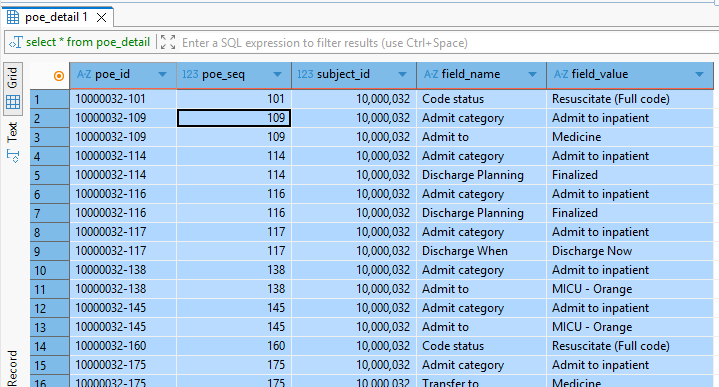

**! Note 1**: Bảng này khó có thể tạo ra PK dựa trên 1 tổ hợp thuộc tính (trừ khi lấy tất cả thuộc tính gộp thành PK thì mới duy trì được tính duy nhất), nhưng mà nếu làm như thế sẽ không hợp lý, và truy vấn sẽ không tối ưu, đánh index cũng sẽ không hiệu quả => **Cần tạo surrogate key (là 1 cột với giá trị số tăng tự động)**

###### **2.1.1.3. Thanh toán (Billing)**

- Bảng *diagnoses_icd*:

| **Trường**    | **Loại dữ liệu** | **Ý nghĩa**                              | **Mô tả**                                                                        |
| ------------- | ---------------- | ---------------------------------------- | -------------------------------------------------------------------------------- |
| `subject_id` (FK)  | int              | Mã định danh bệnh nhân                   | Liên kết với bảng `patients` để lấy thông tin nhân khẩu học.                     |
| `hadm_id` (FK) (PK)   | int              | Mã định danh của lần nhập viện           | Liên kết với bảng `admissions` để biết thông tin chi tiết lần nhập viện.         |
| `seq_num`  (PK)   | int              | Thứ tự chẩn đoán trong một lần nhập viện | 1 = chẩn đoán chính, các số khác = chẩn đoán phụ. Khóa chính cùng với `hadm_id`. |
| `icd_code` (FK)   | string           | Mã ICD chẩn đoán                         | Liên kết với bảng `d_icd_diagnoses` để lấy tên và mô tả bệnh.                    |
| `icd_version` (FK) | int              | Phiên bản ICD                            | 9 hoặc 10, xác định mã ICD thuộc ICD-9 hay ICD-10.                               |


- Bảng *d_icd_dianoses:*

| Trường       | Loại dữ liệu | Ý nghĩa                 | Mô tả                                                                          |
| ------------ | ------------ | ----------------------- | ------------------------------------------------------------------------------ |
| icd\_code (PK)   | string       | Mã ICD                  | Mã chẩn đoán bệnh theo ICD (International Classification of Diseases).         |
| icd\_version (PK) | int          | Phiên bản ICD           | Xác định mã được lấy từ ICD-9 (9) hay ICD-10 (10).                             |
| long\_title  | string       | Mô tả đầy đủ của mã ICD | Cung cấp mô tả chi tiết, đầy đủ của bệnh/triệu chứng tương ứng với `icd_code`. |


- Bảng *procedures_icd:*

| Trường       | Loại dữ liệu | Ý nghĩa          | Mô tả                                                           |
| ------------ | ------------ | ---------------- | --------------------------------------------------------------- |
| subject\_id (FK) | int          | Mã bệnh nhân     | Liên kết đến bảng **patients** để xác định bệnh nhân.           |
| hadm\_id  (FK)   | int          | Mã lần nhập viện | Liên kết đến bảng **admissions** để biết lần nhập viện cụ thể.  |
| seq\_num     | int          | Thứ tự thủ thuật | Đánh số thứ tự thủ thuật trong cùng một lần nhập viện.          |
| icd\_code (FK)   | string       | Mã thủ thuật ICD | Mã thủ thuật theo ICD.                                          |
| icd\_version (FK) | int          | Phiên bản ICD    | Xác định thủ thuật được mã hóa theo ICD-9 (9) hoặc ICD-10 (10). |


- Bảng *d_icd_procedures:*

| Trường       | Loại dữ liệu | Ý nghĩa                  | Mô tả                                                                          |
| ------------ | ------------ | ------------------------ | ------------------------------------------------------------------------------ |
| icd\_code (PK)   | string       | Mã thủ thuật ICD         | Mã chuẩn để định danh thủ thuật y tế.                                          |
| icd\_version (PK) | int          | Phiên bản ICD            | 9 = ICD-9, 10 = ICD-10. Giúp phân biệt khi cùng một mã nhưng ở phiên bản khác. |
| long\_title  | string       | Mô tả chi tiết thủ thuật | Mô tả đầy đủ, dễ đọc về thủ thuật (ví dụ: *"Appendectomy, laparoscopic"*).     |


- Bảng *drgcodes:*

Bảng drgcodes được thiết kế để lưu trữ thông tin về các nhóm chẩn đoán liên quan (Diagnosis Related Group - DRG), thường được sử dụng trong hệ thống y tế để phân loại các ca bệnh nhằm mục đích thanh toán, quản lý chi phí và phân tích dữ liệu y tế.

| Trường       | Loại dữ liệu | Ý nghĩa                  | Mô tả                                                                          |
| ------------ | ------------ | ------------------------ | ------------------------------------------------------------------------------ |
| drg_code (PK)   | string       | Mã DRG            | Mã chuẩn để định danh nhóm chẩn đoán liên quan (Diagnosis Related Group).       |
| drg_version (PK) | int          | Phiên bản DRG            | Phiên bản của hệ thống DRG (ví dụ: 38 = MS-DRG v38). Giúp phân biệt khi cùng một mã nhưng ở phiên bản khác. |
| description  | string       | Mô tả chi tiết DRG       | Mô tả đầy đủ, dễ đọc về nhóm chẩn đoán (ví dụ: *"Heart failure & shock w CC"*). |

Giải thích:

- drg_code: Là mã duy nhất xác định nhóm chẩn đoán liên quan, thường được sử dụng trong hệ thống thanh toán y tế.
- drg_version: Xác định phiên bản của hệ thống DRG, cần thiết để tránh nhầm lẫn giữa các mã trùng lặp ở các phiên bản khác nhau.
- description: Cung cấp thông tin chi tiết, dễ hiểu về nhóm chẩn đoán mà mã DRG đại diện.

- Bảng hcpcsevents:

- Bảng d_hcps:

###### **2.1.1.4. Đo lường (Measurements)**

###### **2.1.1.5. Thuốc (Medication)**

##### **2.1.2. Module icu (Hồi sức tích cực)**

###### **2.1.2.1. Theo dõi bệnh nhân (Patient tracking)**

###### **2.1.2.2. Đo lường (Measurements)**

##### **2.1.3. Module note (Ghi chú lâm sàng)**

###### **2.1.3.1. Các bảng dữ liệu ghi chú**